In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKLearnKMeans

In [17]:
class KMeansClustering:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels_ = None
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly
        self.centroids = np.random.uniform(
            np.amin(X, axis=0), 
            np.amax(X, axis=0), 
            size=(self.n_clusters, n_features)
        )
        
        # Iterative optimization
        for _ in range(self.max_iters):
            # Assign samples to closest centroids
            labels = self._assign_clusters(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.max(np.abs(new_centroids - self.centroids)) < self.tol:
                break
                
            self.centroids = new_centroids
            
        self.labels_ = self._assign_clusters(X)
        return self
    
    def _assign_clusters(self, X):
        labels = []
        for sample in X:
            distances = [self._euclidean_distance(sample, centroid) for centroid in self.centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_samples = X[labels == k]
            if len(cluster_samples) > 0:
                new_centroids[k] = np.mean(cluster_samples, axis=0)
            else:
                new_centroids[k] = self.centroids[k]
        return new_centroids
    
    def predict(self, X):
        return self._assign_clusters(X)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

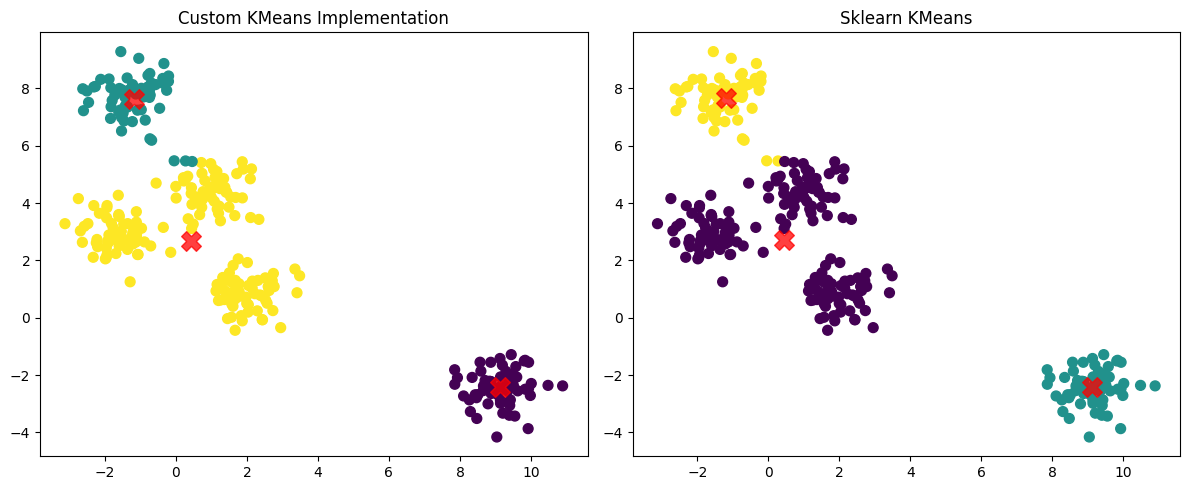

In [19]:
# Create test data
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Train custom model
my_kmeans = KMeansClustering(n_clusters=3)
my_kmeans.fit(X)

# Train sklearn model
sk_kmeans = SKLearnKMeans(n_clusters=3, random_state=0)
sk_kmeans.fit(X)

# Visualize both results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Custom implementation
ax1.scatter(X[:, 0], X[:, 1], c=my_kmeans.labels_, s=50, cmap='viridis')
ax1.scatter(my_kmeans.centroids[:, 0], my_kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax1.set_title("Custom KMeans Implementation")

# Sklearn
ax2.scatter(X[:, 0], X[:, 1], c=sk_kmeans.labels_, s=50, cmap='viridis')
ax2.scatter(sk_kmeans.cluster_centers_[:, 0], sk_kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax2.set_title("Sklearn KMeans")

plt.tight_layout()
plt.show()